### import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 1. Perform basic EDA 


### importing data

In [3]:
import pandas as pd
df = pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [4]:
print(df.info()) # To see the structure of the DataFrame
print(df.describe()) # Basic statistical details 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

## 2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

### a) Mean and Standard deviation

In [5]:
mean_price = df['price_per_sqft'].mean()
print("Mean:", mean_price)

Mean: 7920.336742424242


### b)Percentile

In [6]:
percentiles = np.percentile(df['price_per_sqft'], [25, 50, 75])
print("Percentiles:",percentiles)

Percentiles: [4267. 5438. 7317.]


### c)IQR

In [7]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:",Q3,"-",Q1,"=",IQR)

IQR: 7317.0 - 4267.0 = 3050.0


### d)Z-scores

In [8]:
z_scores = np.abs(stats.zscore(df['price_per_sqft']))
print("z_scores:",z_scores)

z_scores: 0        0.039554
1        0.030971
2        0.033876
3        0.015698
4        0.034391
           ...   
13195    0.011538
13196    0.029897
13197    0.024946
13198    0.023300
13199    0.045260
Name: price_per_sqft, Length: 13200, dtype: float64


## Define the lower and upper bounds to identify outliers

In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("lower_bound =",lower_bound)
print("upper_bound =",upper_bound)

lower_bound = -308.0
upper_bound = 11892.0


## Detect and remove outliers

In [10]:
outliers_removed_df = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]
outliers_removed_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# 3.  Box plot 

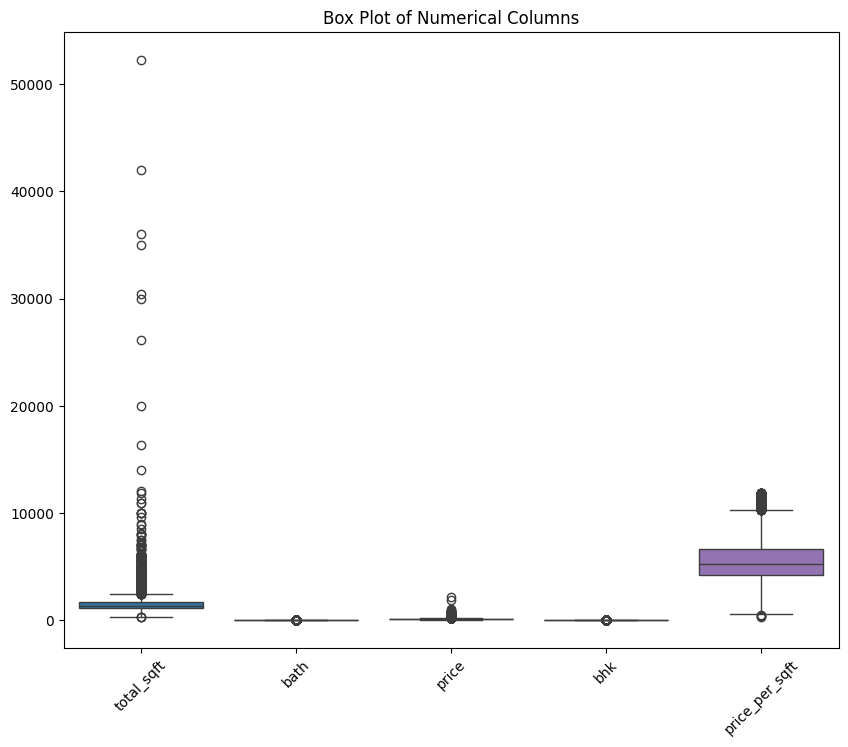

In [11]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=outliers_removed_df)
plt.xticks(rotation=45)
plt.title('Box Plot of Numerical Columns')
plt.show()

# 4. Histplot

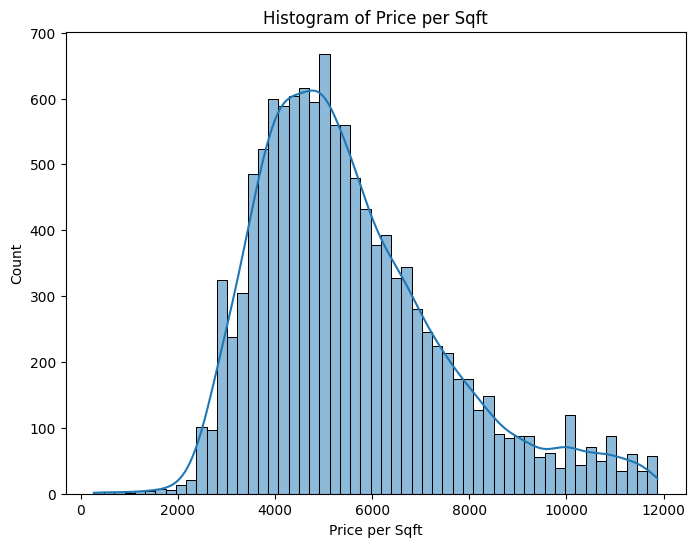

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(outliers_removed_df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Count')
plt.show()

# 5. Correlation Heatmap

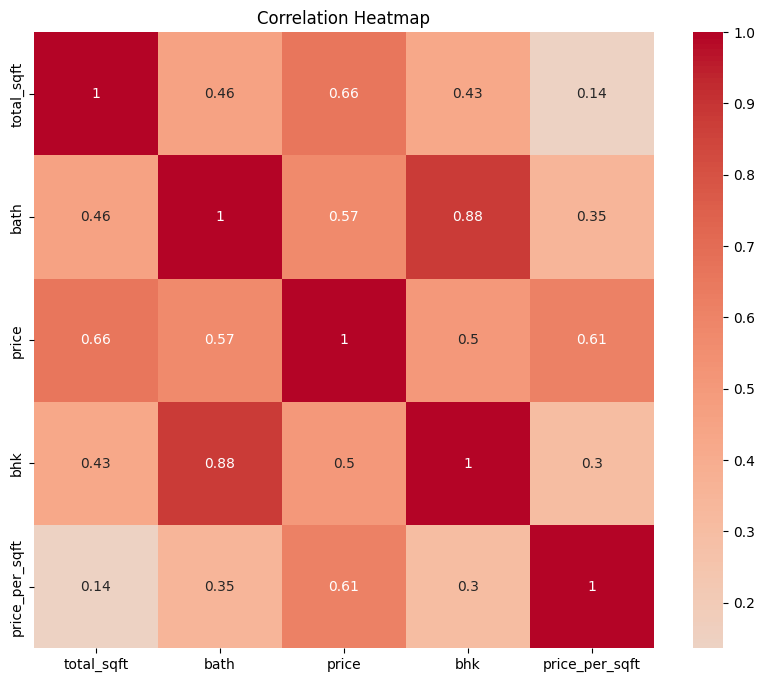

In [13]:
# Select only numerical columns for correlation analysis
numerical_columns = outliers_removed_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# 6.Scatter Plot

<Figure size 1000x800 with 0 Axes>

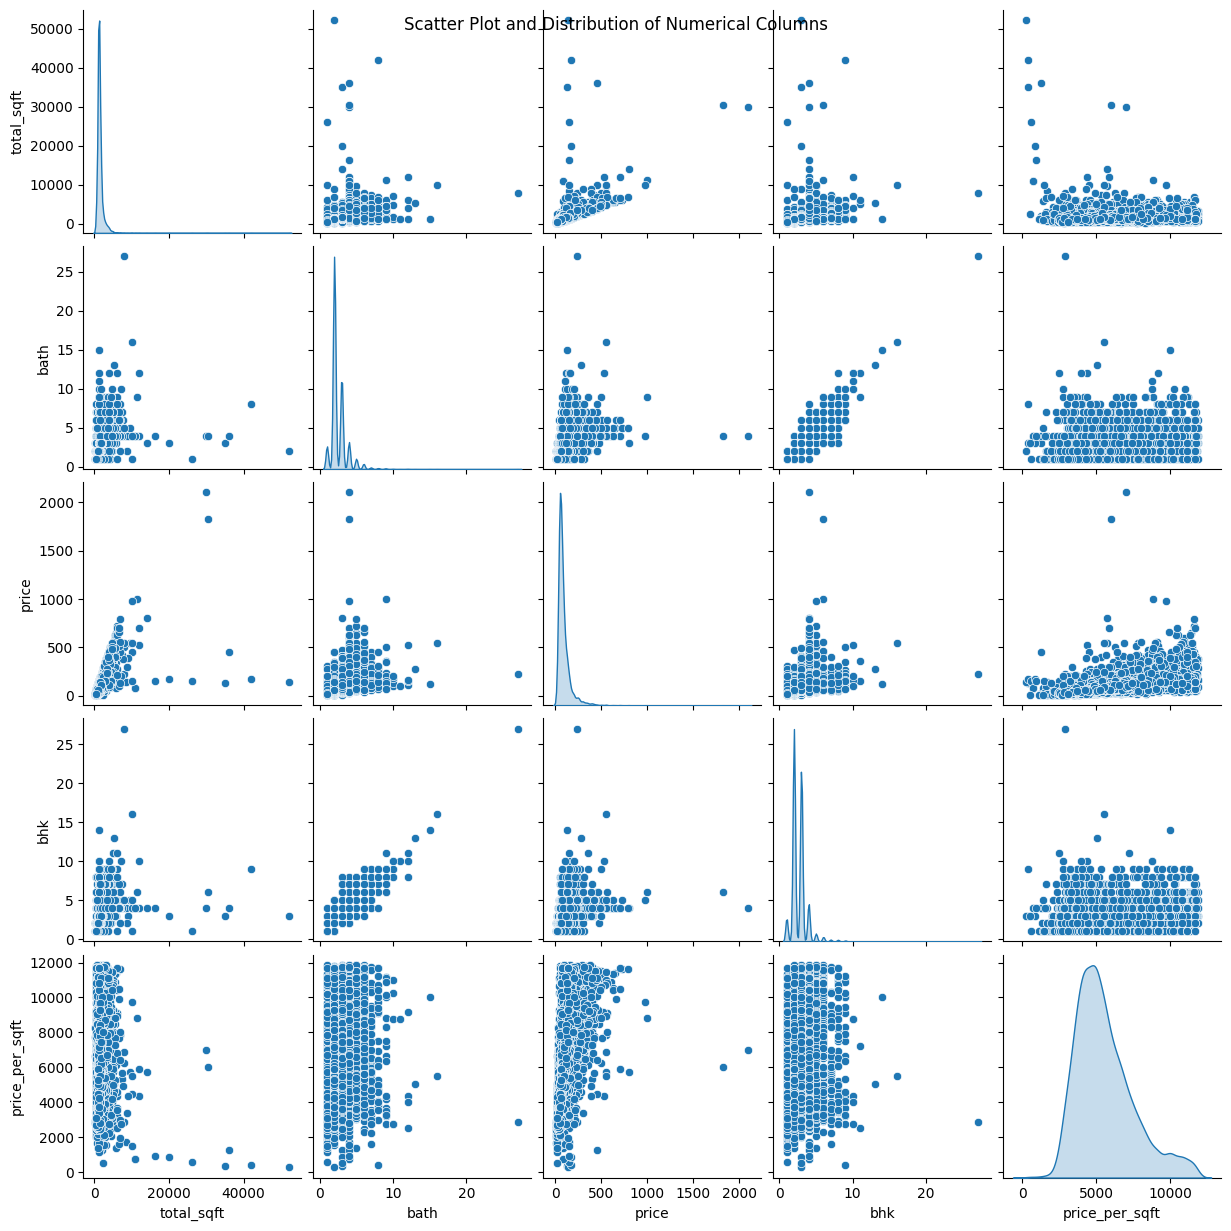

In [14]:
plt.figure(figsize=(10, 8))
sns.pairplot(outliers_removed_df, diag_kind='kde')
plt.suptitle('Scatter Plot and Distribution of Numerical Columns')
plt.show()